In [2]:
import pandas as pd
file_path = 'D:\Download\Do An PTTK\ACB_new.csv'
data = pd.read_csv(file_path)
# Xem data 
data

,Date,Close,Open,High,Low,Volume,% Change
0,25/12/2023,23350,23250,23450,23200,758000000,0.65%
1,22/12/2023,23200,23200,23300,23200,451000000,-0.22%
2,21/12/2023,23250,23200,23250,23050,708000000,0.22%
3,20/12/2023,23200,23050,23250,23050,886000000,0.65%
4,19/12/2023,23050,22800,23100,22800,1147000000,1.10%
...,...,...,...,...,...,...,...
1486,8/1/2018,12005,11615,12005,11615,1296000000,3.35%
1487,5/1/2018,11615,11675,11825,11496,2156000000,0.00%
1488,4/1/2018,11615,11586,11645,11496,2126000000,0.26%
1489,3/1/2018,11586,11615,11705,11376,1689000000,-0.26%


In [3]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [5]:
# 2. Đọc file dữ liệu  và chia train test validate theo tỉ lệ 7:3
df = pd.read_csv('D:\Download\Do An PTTK\ACB_new.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

# val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [6]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=15574.992, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15571.886, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15573.552, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15573.559, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15570.631, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15574.851, Time=0.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.854 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))



In [9]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520.
 11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520.
 11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520. 11520.]


In [10]:
# 7. Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)


Testing RMSE: 1478.684330407707


Testing RMSE: 1478.684330407707


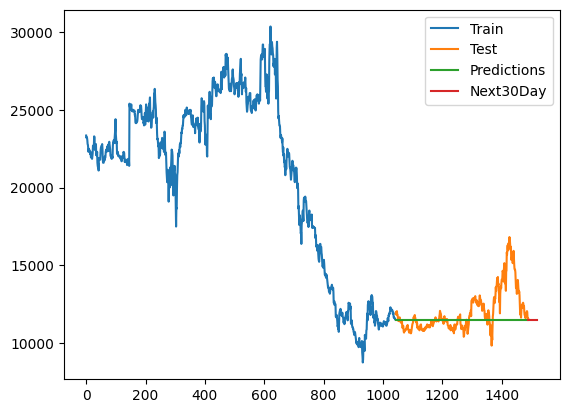

In [11]:
# 8. Tính RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
# plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [35]:
test_data.index

RangeIndex(start=1043, stop=1490, step=1)